In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pandas.api.types import is_string_dtype, is_object_dtype, is_categorical_dtype, is_bool_dtype
import numpy as np
import pandas as pd

import statsmodels.api as sm
from scipy.stats import spearmanr
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

from collections import OrderedDict

from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from timeit import default_timer as timer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston
from pandas.api.types import is_string_dtype, is_object_dtype, is_categorical_dtype, is_bool_dtype
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model


## partial dependence curves

In [86]:
width = 3

def synthetic_interaction_data(n):
    df = pd.DataFrame()
    for i in range(2):
        df[f'x{i + 1}'] = np.random.random_sample(size=n) * width
    yintercept = 100
    df['y'] = df['x1']**2 + df['x2'] + yintercept
    eqn = "y = x1 * x2"
    return df, eqn

In [122]:
def friedman_partial_dependence(model,X,colname,numx=100,mean_centered=True):
    save_x = X[colname].copy()
    if numx is not None:
        uniq_x = np.linspace(start=np.min(X[colname]), stop=np.max(X[colname]), num=numx)
    else:
        uniq_x = np.unique(X[colname])
    pdpx = uniq_x
    pdpy = np.empty(shape=(len(uniq_x),))
    for i,x in enumerate(uniq_x):
        X[colname] = x
    #     print(X)
        y_pred = model.predict(X)
        pdpy[i] = y_pred.mean()
    X[colname] = save_x
    if mean_centered:
        pdpy = pdpy - np.mean(pdpy)
    return pdpx, pdpy

In [123]:
n = 200
df, eqn = synthetic_interaction_data(n)
X = df.drop('y', axis=1)
y = df['y']

In [124]:
X.head(3)

,x1,x2
0,1.766069,1.118012
1,0.404317,1.785018
2,1.279775,0.134428


In [125]:
rf = RandomForestRegressor(n_estimators=30)
_ = rf.fit(X,y)

In [133]:
pdpxs = []
pdpys = []
for i,colname in enumerate(X.columns):
    pdpx, pdpy = friedman_partial_dependence(rf,X,colname,numx=None)
    pdpxs.append(pdpx)
    pdpys.append(pdpy)

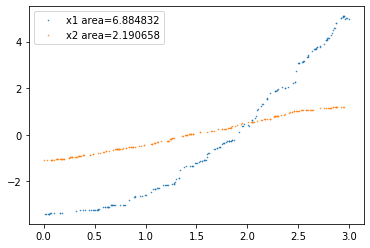

In [134]:
fig, ax = plt.subplots(1,1)
ax.plot(pdpxs[0], pdpys[0], '.', markersize=1, label=f"x1 area={np.mean(np.abs(pdpy1))*3:2f}")
ax.plot(pdpxs[1], pdpys[1], '.', markersize=1, label=f"x2 area={np.mean(np.abs(pdpy2))*3:2f}")
plt.legend()
plt.show()

They estimate $f(z_S)$ with $E[f(z) | z_S]$

In [174]:
import scipy
import itertools

X = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
x = masker_data[1,:] # pick an instance
print("x =", x)
# From https://github.com/slundberg/shap/blob/master/shap/explainers/bruteforce.py
masker = lambda x, mask: x * mask + X * np.invert(mask)
def powerset(iterable):
    s = list(iterable)
    return itertools.chain.from_iterable(itertools.combinations(s, r) for r in range(len(s)+1))

x = [4 5 6]


In [166]:
masker(x, [False,True,True])

array([[1, 5, 6],
       [4, 5, 6],
       [7, 5, 6]])

In [167]:
masker(x, [True,True,True])

array([[4, 5, 6],
       [4, 5, 6],
       [4, 5, 6]])

In [168]:
masker(x, [False,False,False])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [177]:
masker(x, [False,False,True])

array([[1, 2, 6],
       [4, 5, 6],
       [7, 8, 6]])

In [170]:
p = 3
weight = 1 / (scipy.special.comb(p - 1, len(s)) * p)
weight

0.3333333333333333

In [176]:
ps = powerset(set(range(p)).difference([0]))
list(ps)

[(), (1,), (2,), (1, 2)]

In [63]:
df = pd.read_csv("/tmp/t.csv")
df.sort_values('Importance', ascending=False)

FileNotFoundError: [Errno 2] File b'/tmp/t.csv' does not exist: b'/tmp/t.csv'

In [149]:
R = df.copy()
R['clipped'] = np.where(R['Sigma']<0.007, 1, R['Sigma'])
R['Rank'] = R['Importance'] / R['clipped']
R.sort_values('Rank',ascending=False)

,Feature,Rank,Importance,Sigma,clipped
2,ModelID,10.013405,0.165620,0.016540,0.016540
6,ProductSize,9.710048,0.078312,0.008065,0.008065
1,YearMade,3.968520,0.304781,0.076800,0.076800
8,saledayofweek,3.431516,0.025268,0.007364,0.007364
9,salemonth,1.988941,0.015781,0.007935,0.007935
0,age,1.812289,0.194837,0.107509,0.107509
5,saledayofyear,1.736897,0.044144,0.025415,0.025415
4,auctioneerID,1.571823,0.042153,0.026818,0.026818
10,saleday,1.361876,0.010579,0.007768,0.007768
3,MachineHours,1.304369,0.051107,0.039181,0.039181


In [146]:
np.mean(df['Sigma']), np.std(df['Sigma'])

(0.022317773175551302, 0.02996326640295244)

In [191]:
h = np.array([[0,4,2,np.nan],
              [np.nan,0,3,5],
              [6,0,8,np.nan]])
h = h.T
h

array([[ 0., nan,  6.],
       [ 4.,  0.,  0.],
       [ 2.,  3.,  8.],
       [nan,  5., nan]])

In [ ]:
h = np.array([[1,0,np.nan,np.nan],
              [0,4,2,np.nan],
              [np.nan,0,3,5],
              [6,0,8,np.nan],
              [1,np.nan,np.nan,0]])
h = h.T
h

r = np.array([1,0,1,1,3]) # relative to this row

In [239]:
h[:,np.where(r==1)[0]] # columns relative to 1

array([[ 1., nan,  6.],
       [ 0.,  0.,  0.],
       [nan,  3.,  8.],
       [nan,  5., nan]])

In [240]:
s = np.nansum(h[:,np.where(r==1)[0]], axis=1)
s

array([ 7.,  0., 11.,  5.])

In [241]:
c = (~np.isnan(h[:,np.where(r==1)[0]])).astype(int)
c

array([[1, 0, 1],
       [1, 1, 1],
       [0, 1, 1],
       [0, 1, 0]])

In [242]:
c = np.sum(c, axis=1) # can ignore element at current relative pos==1
c[1] = 0
c

array([2, 0, 2, 1])

In [243]:
s/c

/Users/parrt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([3.5, nan, 5.5, 5. ])

In [424]:
ncats=h.shape[0]
nleaves=h.shape[1]
catcodes=[0,1,2,3]
sums = []
counts = []
# result = np.zeros(shape=(ncats,))
for i in sorted(np.unique(r)):
    print("cat",i,"relative to", result[i], "for", h[:,np.where(r==i)[0]])
    s = np.nansum(h[:,np.where(r==i)[0]], axis=1)
    s[i] = 0.0
    c = (h[:,np.where(r==i)[0]]>0).astype(int)
    c = np.sum(c, axis=1) # can ignore element at current relative pos==i
    counts.append(c)
    sums.append(s)
    print("count",c)
    print("sum",s)
#     print("avg",s/c)
    result += s
print()
print("sums\n", np.array(sums).T)
print("counts\n",np.array(counts).T)
print("uniq r=",np.unique(r))

cat 0 relative to 3885.0 for [[ 0.]
 [ 4.]
 [ 2.]
 [nan]]
count [0 1 1 0]
sum [0. 4. 2. 0.]
cat 1 relative to 974.0 for [[ 1. nan  6.]
 [ 0.  0.  0.]
 [nan  3.  8.]
 [nan  5. nan]]
count [2 0 2 1]
sum [ 7.  0. 11.  5.]
cat 3 relative to 1222.0 for [[ 1.]
 [nan]
 [nan]
 [ 0.]]
count [1 0 0 0]
sum [1. 0. 0. 0.]

sums
 [[ 0.  7.  1.]
 [ 4.  0.  0.]
 [ 2. 11.  0.]
 [ 0.  5.  0.]]
counts
 [[0 2 1]
 [1 0 0]
 [1 2 0]
 [0 1 0]]
uniq r= [0 1 3]


/Users/parrt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()


In [425]:
a = (np.array(sums)/np.array(counts)).T
#a[np.isnan(a)] = 0
a

/Users/parrt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([[nan, 3.5, 1. ],
       [4. , nan, nan],
       [2. , 5.5, nan],
       [nan, 5. , nan]])

In [426]:
uniq_r = sorted(np.unique(r))
x = a[:,0] # init with first col
x

array([nan,  4.,  2., nan])

In [419]:
adjusted_vec = x[uniq_r[1]] + a[:,1]
#adjusted_vec[uniq_r[1]] = 0
adjusted_vec

array([7.5, nan, 9.5, 9. ])

In [420]:
x = np.where(np.isnan(x), 0, x) + np.where(np.isnan(adjusted_vec), 0, adjusted_vec)
x

array([ 7.5,  4. , 11.5,  9. ])

In [421]:
adjusted_vec = x[uniq_r[2]] + a[:,2]
#adjusted_vec[uniq_r[2]] = 0
adjusted_vec

array([10., nan, nan, nan])

In [422]:
x = np.where(np.isnan(x), 0, x) + np.where(np.isnan(adjusted_vec), 0, adjusted_vec)
x

array([17.5,  4. , 11.5,  9. ])

In [432]:
a = (np.array(sums)/np.array(counts)).T
uniq_r = sorted(np.unique(r))
x = a[:,uniq_r[0]] # init with first col
print(uniq_r[0],":",x)
for i in range(1,len(uniq_r)):
    adjusted_vec = x[uniq_r[i]] + a[:,i]
    x = np.where(np.isnan(x), 0, x) + np.where(np.isnan(adjusted_vec), 0, adjusted_vec)
    print(uniq_r[i],":",adjusted_vec,"x =",x)
x

0 : [nan  4.  2. nan]
1 : [7.5 nan 9.5 9. ] x = [ 7.5  4.  11.5  9. ]
3 : [10. nan nan nan] x = [17.5  4.  11.5  9. ]


/Users/parrt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([17.5,  4. , 11.5,  9. ])

In [452]:
def avg_values_at_cat(leaf_histos, min_cats):
    sums = []
    counts = []
    # result = np.zeros(shape=(ncats,))
    for i in sorted(np.unique(min_cats)):
        s = np.nansum(leaf_histos[:, np.where(min_cats == i)[0]], axis=1)
#        s[i] = 0.0
        c = (leaf_histos[:, np.where(min_cats == i)[0]] > 0).astype(int)
        c = np.sum(c, axis=1)  # can ignore element at current relative pos==i
        counts.append(c)
        sums.append(s)
        # print("count", c)
        # print("sum", s)
        #     print("avg",s/c)
    print()
    print("list sums",sums)
    print("list counts", counts)
    print("sums\n", np.array(sums).T)
    print("counts\n", np.array(counts).T)
    print("uniq r=", np.unique(min_cats))
    uniq_min_cats = sorted(np.unique(min_cats))
#    a = (np.array(sums)/np.array(counts)).T
    a = [sums[i]/counts[i] for i in range(len(uniq_min_cats))]
    x = a[uniq_min_cats[0]] # init with first col
    print(uniq_min_cats[0],":",x)
    for i in range(1,len(uniq_min_cats)):
        adjusted_vec = x[uniq_min_cats[i]] + a[i]
        x = np.where(np.isnan(x), 0, x) + np.where(np.isnan(adjusted_vec), 0, adjusted_vec)
        print(uniq_min_cats[i],":",adjusted_vec,"x =",x)
    print(x)
    return x

In [453]:
leaf_histos = np.array([[1,0,np.nan,np.nan],
                      [0,4,2,np.nan],
                      [np.nan,0,3,5],
                      [6,0,8,np.nan],
                      [1,np.nan,np.nan,0]])
leaf_histos = leaf_histos.T
print(leaf_histos)

min_cats = np.array([1,0,1,1,3]) # relative to this row
avg_values_at_cat(leaf_histos, min_cats)

[[ 1.  0. nan  6.  1.]
 [ 0.  4.  0.  0. nan]
 [nan  2.  3.  8. nan]
 [nan nan  5. nan  0.]]

list sums [array([0., 4., 2., 0.]), array([ 7.,  0., 11.,  5.]), array([1., 0., 0., 0.])]
list counts [array([0, 1, 1, 0]), array([2, 0, 2, 1]), array([1, 0, 0, 0])]
sums
 [[ 0.  7.  1.]
 [ 4.  0.  0.]
 [ 2. 11.  0.]
 [ 0.  5.  0.]]
counts
 [[0 2 1]
 [1 0 0]
 [1 2 0]
 [0 1 0]]
uniq r= [0 1 3]
0 : [nan  4.  2. nan]
1 : [7.5 nan 9.5 9. ] x = [ 7.5  4.  11.5  9. ]
3 : [10. nan nan nan] x = [17.5  4.  11.5  9. ]
[17.5  4.  11.5  9. ]


/Users/parrt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
/Users/parrt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


array([17.5,  4. , 11.5,  9. ])

In [511]:
a = np.array([3,3,3,2,3,4,4,8,1,2,1,1,1,3,2,2,2,2])
a *= 10

In [512]:
uniq, counts = np.unique(a, return_counts=True)

In [513]:
uniq

array([10, 20, 30, 40, 80])

In [514]:
counts

array([4, 6, 5, 2, 1])

In [515]:
revsort_idx = np.argsort(counts)[::-1]
revsort_idx

array([1, 2, 0, 3, 4])

In [528]:
cats_by_most_common = list(uniq[revsort_idx])
cats_by_most_common

[20, 30, 10, 40, 80]

In [531]:
leaf_cats = np.array([40,20])

In [532]:
leaf_cat_idxs = [list(cats_by_most_common).index(cat) for cat in leaf_cats]
leaf_cat_idxs

[3, 0]

In [533]:
most_common_leaf_cat = cats_by_most_common[np.min(leaf_cat_idxs)]
most_common_leaf_cat

20

In [51]:
df = pd.DataFrame()
df['x1'] = [1,2,3]
df['y']  = [100,100,100]
#df['y'] -= 150
df

,x1,y
0,1,100
1,2,100
2,3,100


In [52]:
df2 = pd.DataFrame()
df2['x1'] = [3,4,5]
df2['y']  = [200,200,200]
#df2['y'] -= 150
df2

,x1,y
0,3,200
1,4,200
2,5,200


In [53]:
df3 = df.merge(df2, on='x1', how='outer')
#df3['y'] = df3['y_x'] + df3['y_y']
df3['y'] = [-50,-50,0,50,50]
df3 = df3[['x1','y']]
print(df3)

   x1   y
0   1 -50
1   2 -50
2   3   0
3   4  50
4   5  50


In [71]:
def load_flights(n):
    """
    Download from https://www.kaggle.com/usdot/flight-delays/download and save
    flight-delays.zip; unzip to convenient data dir.  Save time by storing as
    feather.  5.8M records.
    """
    dir = "/Users/parrt/data/flight-delays"
    if os.path.exists(dir+"/flights.feather"):
        df_flights = pd.read_feather(dir + "/flights.feather")
    else:
        df_flights = pd.read_csv(dir+"/flights.csv", low_memory=False)
        df_flights.to_feather(dir+"/flights.feather")

    df_flights['dayofyear'] = pd.to_datetime(
        df_flights[['YEAR', 'MONTH', 'DAY']]).dt.dayofyear
    df_flights = df_flights[
        (df_flights['CANCELLED'] == 0) & (df_flights['DIVERTED'] == 0)]

    # times are in 830 to mean 08:30, convert to two columns, hour and min
    def cvt_time(df, colname):
        df[f'{colname}_HOUR'] = df[colname] / 100
        df[f'{colname}_HOUR'] = df[f'{colname}_HOUR'].astype(int)
        df[f'{colname}_MIN']  = df[colname] - df[f'{colname}_HOUR'] * 100
        df[f'{colname}_MIN']  = df[f'{colname}_MIN'].astype(int)

    # cvt_time(df_flights, 'SCHEDULED_DEPARTURE')
    # cvt_time(df_flights, 'SCHEDULED_ARRIVAL')
    # cvt_time(df_flights, 'DEPARTURE_TIME')

    features = [#'YEAR',  # drop year as it's a constant
                'MONTH', 'DAY', 'DAY_OF_WEEK', 'dayofyear',
                'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
                'SCHEDULED_DEPARTURE',
                # 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_DEPARTURE_MIN',
                'SCHEDULED_ARRIVAL',
                # 'SCHEDULED_ARRIVAL_HOUR',   'SCHEDULED_ARRIVAL_MIN',
                'DEPARTURE_TIME',
                # 'DEPARTURE_TIME_HOUR',      'DEPARTURE_TIME_MIN',
                'FLIGHT_NUMBER', 'TAIL_NUMBER',
                'AIR_TIME', 'DISTANCE',
                'TAXI_IN', 'TAXI_OUT',
                'SCHEDULED_TIME',
                'ARRIVAL_DELAY']  # target

    df_flights = df_flights[features]
    df_flights = df_flights.dropna()  # ignore missing stuff for ease and reduce size
    df_flights = df_flights.sample(n)
    df_string_to_cat(df_flights)
    df_cat_to_catcode(df_flights)

    X, y = df_flights.drop('ARRIVAL_DELAY', axis=1), df_flights['ARRIVAL_DELAY']

    return X, y, df_flights

def df_string_to_cat(df:pd.DataFrame) -> dict:
    catencoders = {}
    for colname in df.columns:
        if is_string_dtype(df[colname]) or is_object_dtype(df[colname]):
            df[colname] = df[colname].astype('category').cat.as_ordered()
            catencoders[colname] = df[colname].cat.categories
    return catencoders


def df_cat_to_catcode(df):
    for col in df.columns:
        if is_categorical_dtype(df[col]):
            df[col] = df[col].cat.codes + 1


def fix_missing_num(df, colname):
    df[colname+'_na'] = pd.isnull(df[colname]).astype(int)
    df[colname].fillna(df[colname].median(), inplace=True)


def df_split_dates(df,colname):
    df["saleyear"] = df[colname].dt.year
    df["salemonth"] = df[colname].dt.month
    df["saleday"] = df[colname].dt.day
    df["saledayofweek"] = df[colname].dt.dayofweek
    df["saledayofyear"] = df[colname].dt.dayofyear
    df[colname] = df[colname].astype(np.int64) # convert to seconds since 1970


In [114]:
X, y, df_flights = load_flights(1000)

In [115]:
catcolnames={'AIRLINE',
          'ORIGIN_AIRPORT',
          'DESTINATION_AIRPORT',
          'FLIGHT_NUMBER',
          'DAY_OF_WEEK'}
features=df_flights.columns
df = pd.DataFrame(X, columns=features)
#df

In [123]:
for cat in catcolnames:
    df[cat] = df[cat].astype('category').cat.as_ordered()
dummies = pd.get_dummies(df)
X = pd.concat([df, dummies], axis=1)
X = X.drop(catcolnames, axis=1)

In [128]:
X = X.fillna(0)  # flip missing numeric values to zeros

In [129]:
np.isnan(X.values).any()

False

In [131]:
m = LinearRegression()
m.fit(X, y)
y_pred = m.predict(X)
mean_absolute_error(y, y_pred)

6.198033730697716e-11